# Data analysis

## Exploratory data analysis

### Correlation

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
%matplotlib inline

In [65]:
cwd = os.getcwd()
print(cwd)

C:\Users\USER\Downloads\Holmusk_analysis


In [66]:
nan_df = pd.read_csv("C:/Users/USER/Downloads/Holmusk_analysis/nan_df.csv")
final_df = pd.read_csv("C:/Users/USER/Downloads/Holmusk_analysis/final_df.csv")

In [67]:
work_on = final_df

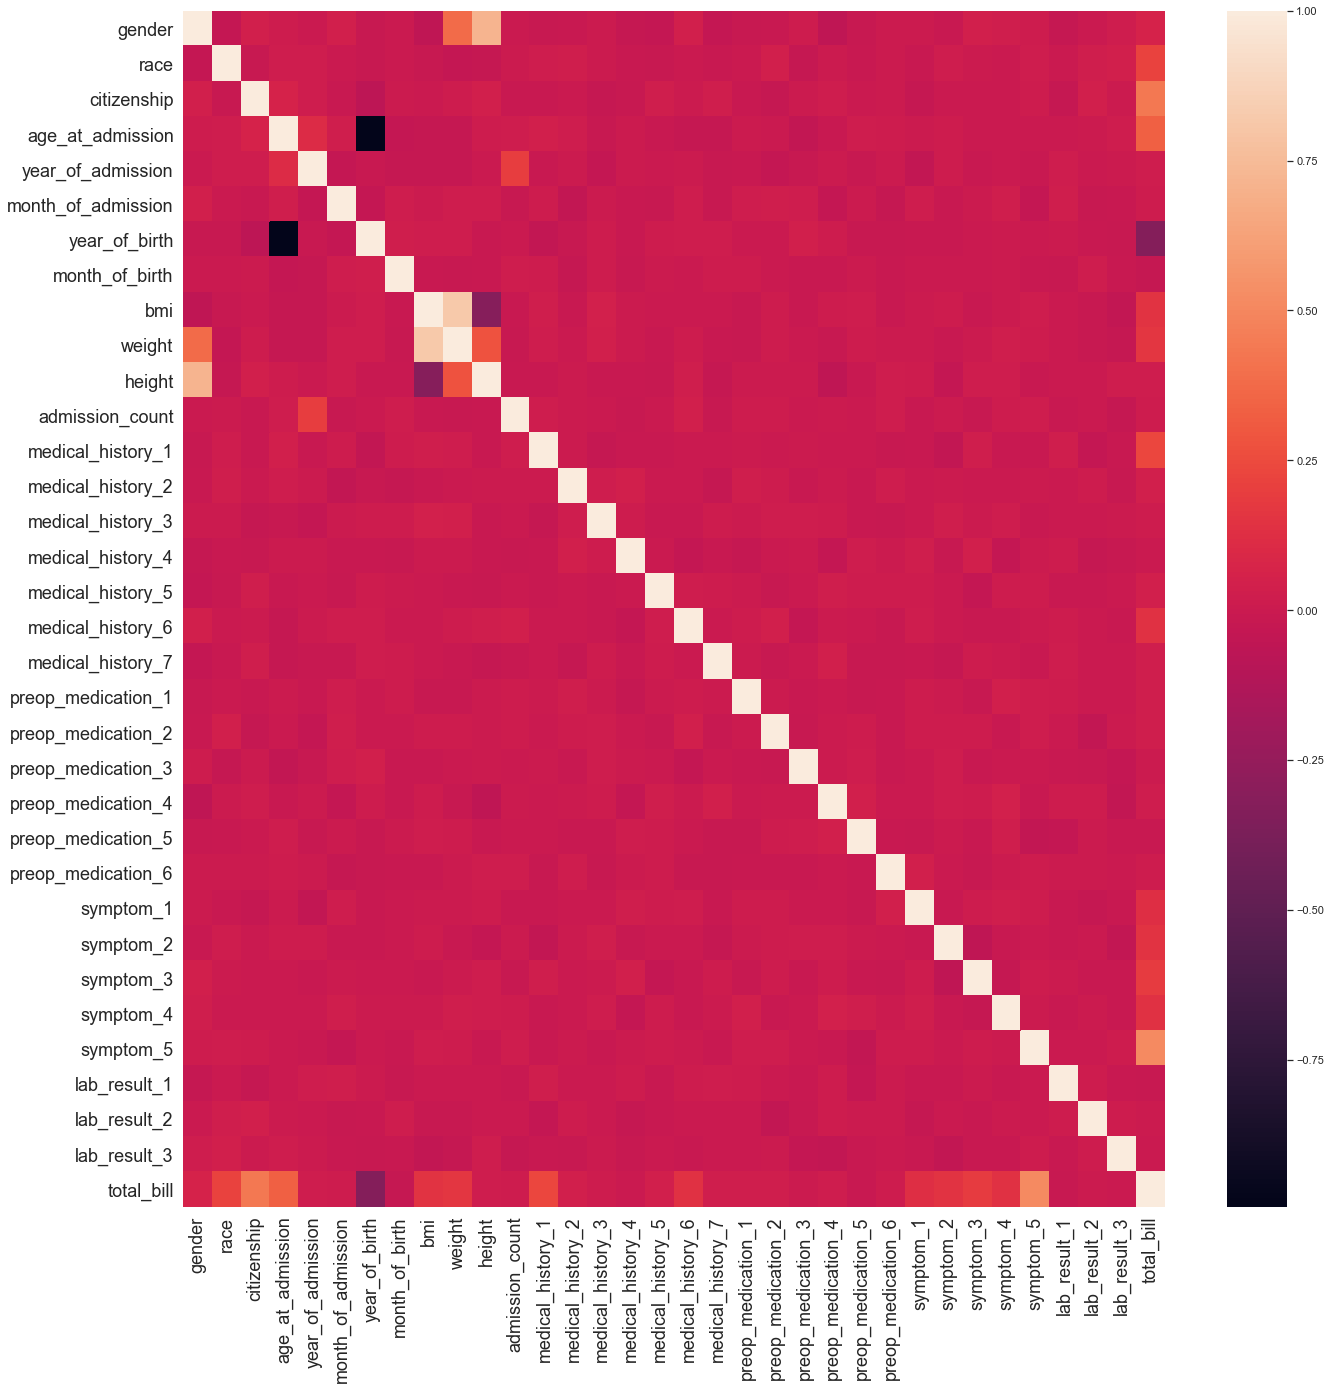

In [68]:
# Plot heat map of correlation
plt.figure(figsize = (22,22))
corrMatrix = work_on.corr()
hm = sns.heatmap(corrMatrix)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=18)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=18)
sns.set(rc = {'figure.figsize': (20,20)})
plt.show()

Some insights from this heatmap:
* Height, weight and BMI are closely related to one another, as we would expect
* Gender is slightly correlated with weight, and more correlated with height
* Year of birth and age at admission are perfectly negatively correlated, as we expect

Most of the factors have some form of relationship with total bill
* These include race, citizenship, age, BMI (not so much), symptom_5, etc.

#### Plot each factor against total bill

In [69]:
len(work_on.columns)

34

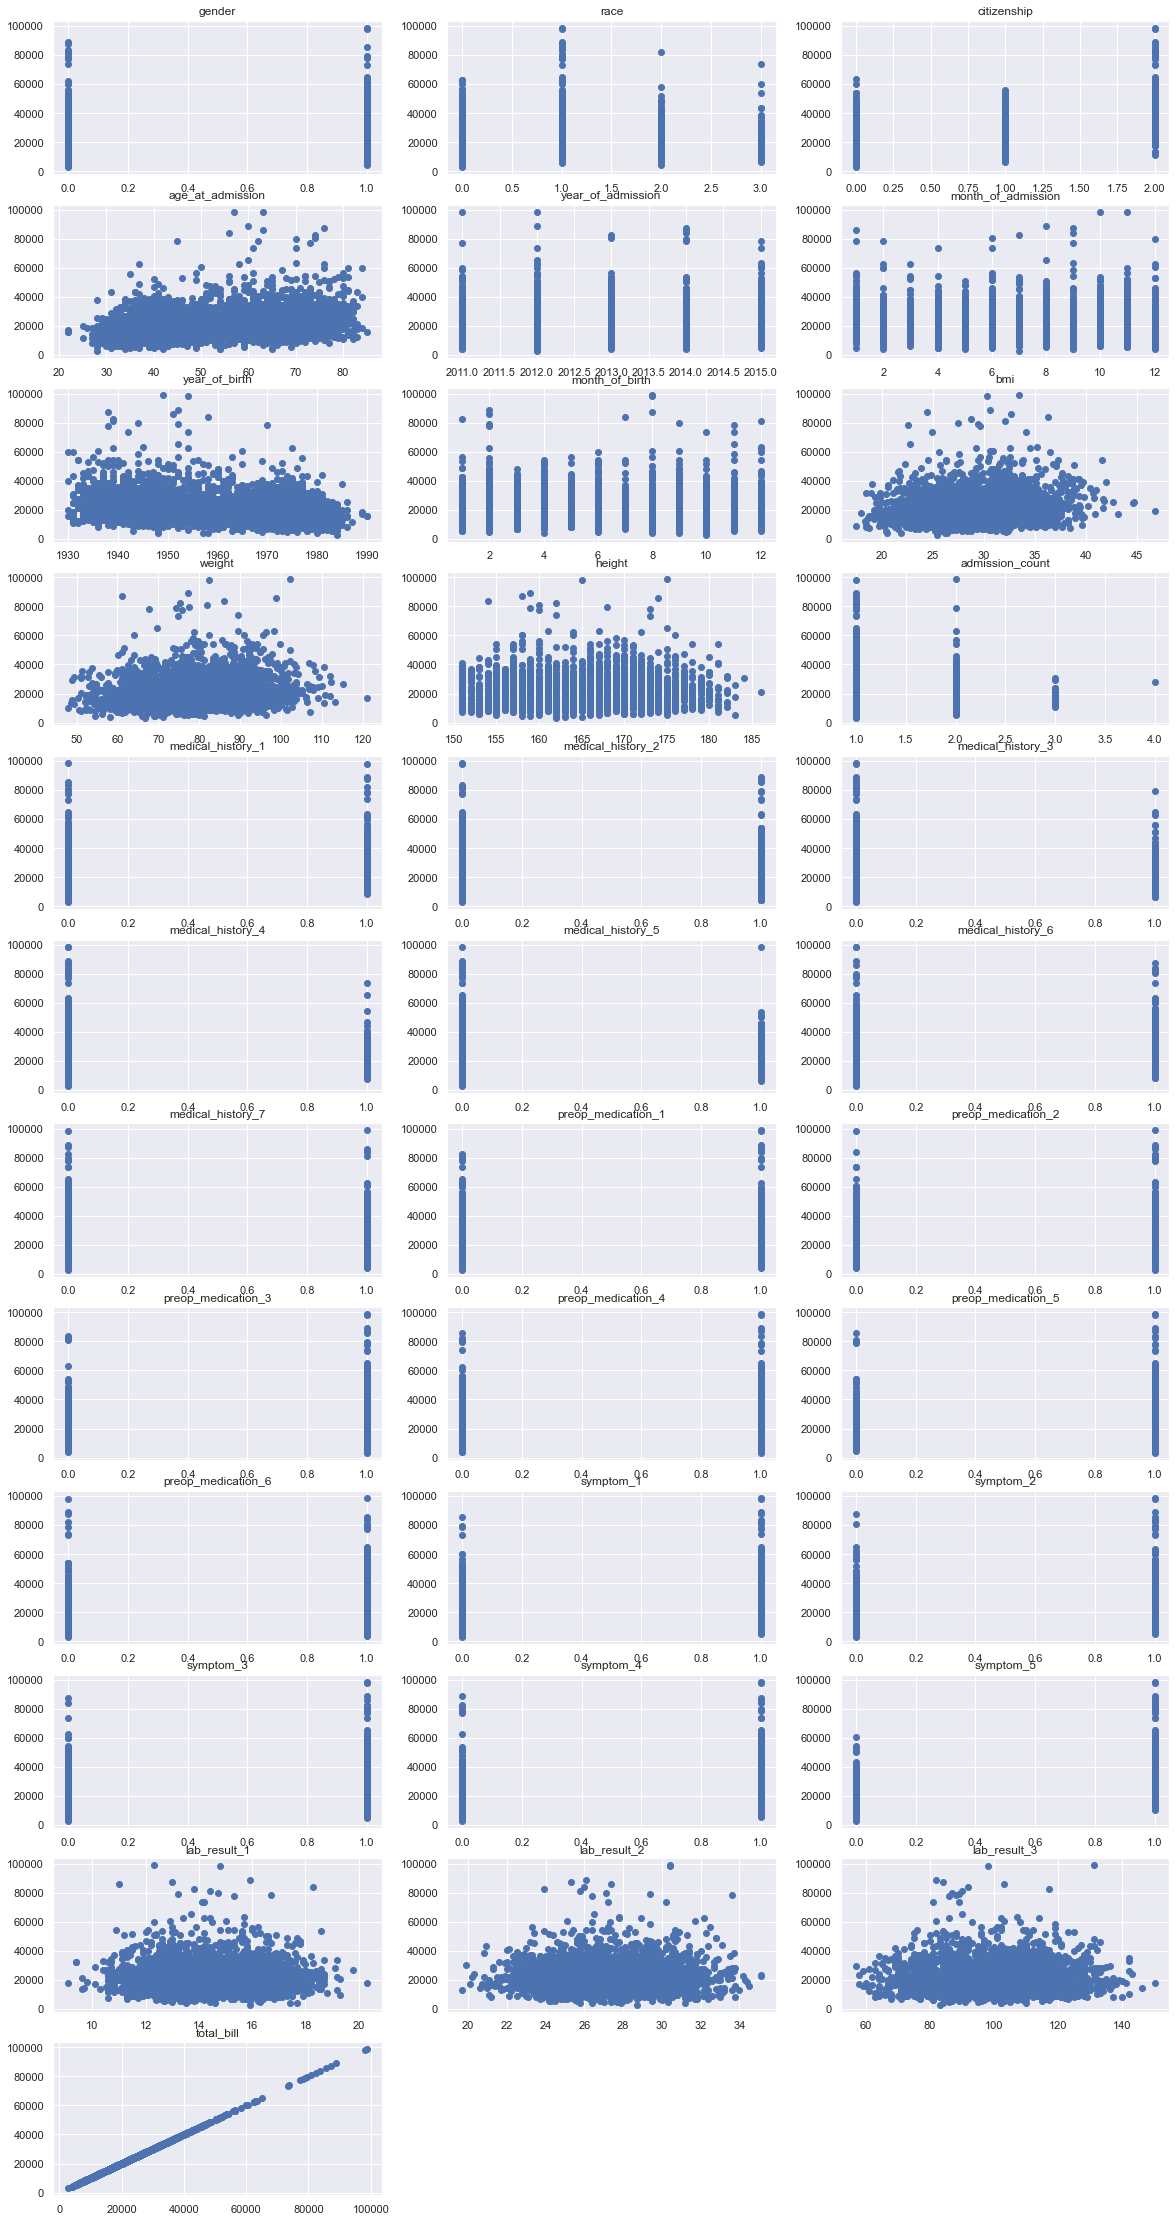

In [70]:
# Scatterplot
fig = plt.figure(1)
fig.set_figheight(40)
fig.set_figwidth(20)
columns = 3
rows = 12

for i in range(len(work_on.columns)):
    fig.add_subplot(rows, columns, i+1)
    plt.scatter(work_on[work_on.columns[i]], work_on["total_bill"])
    plt.title(work_on.columns[i])
    
# plt.tight_layout()
plt.show()

We don't see any obvious relationship between total bill and the other factors from here

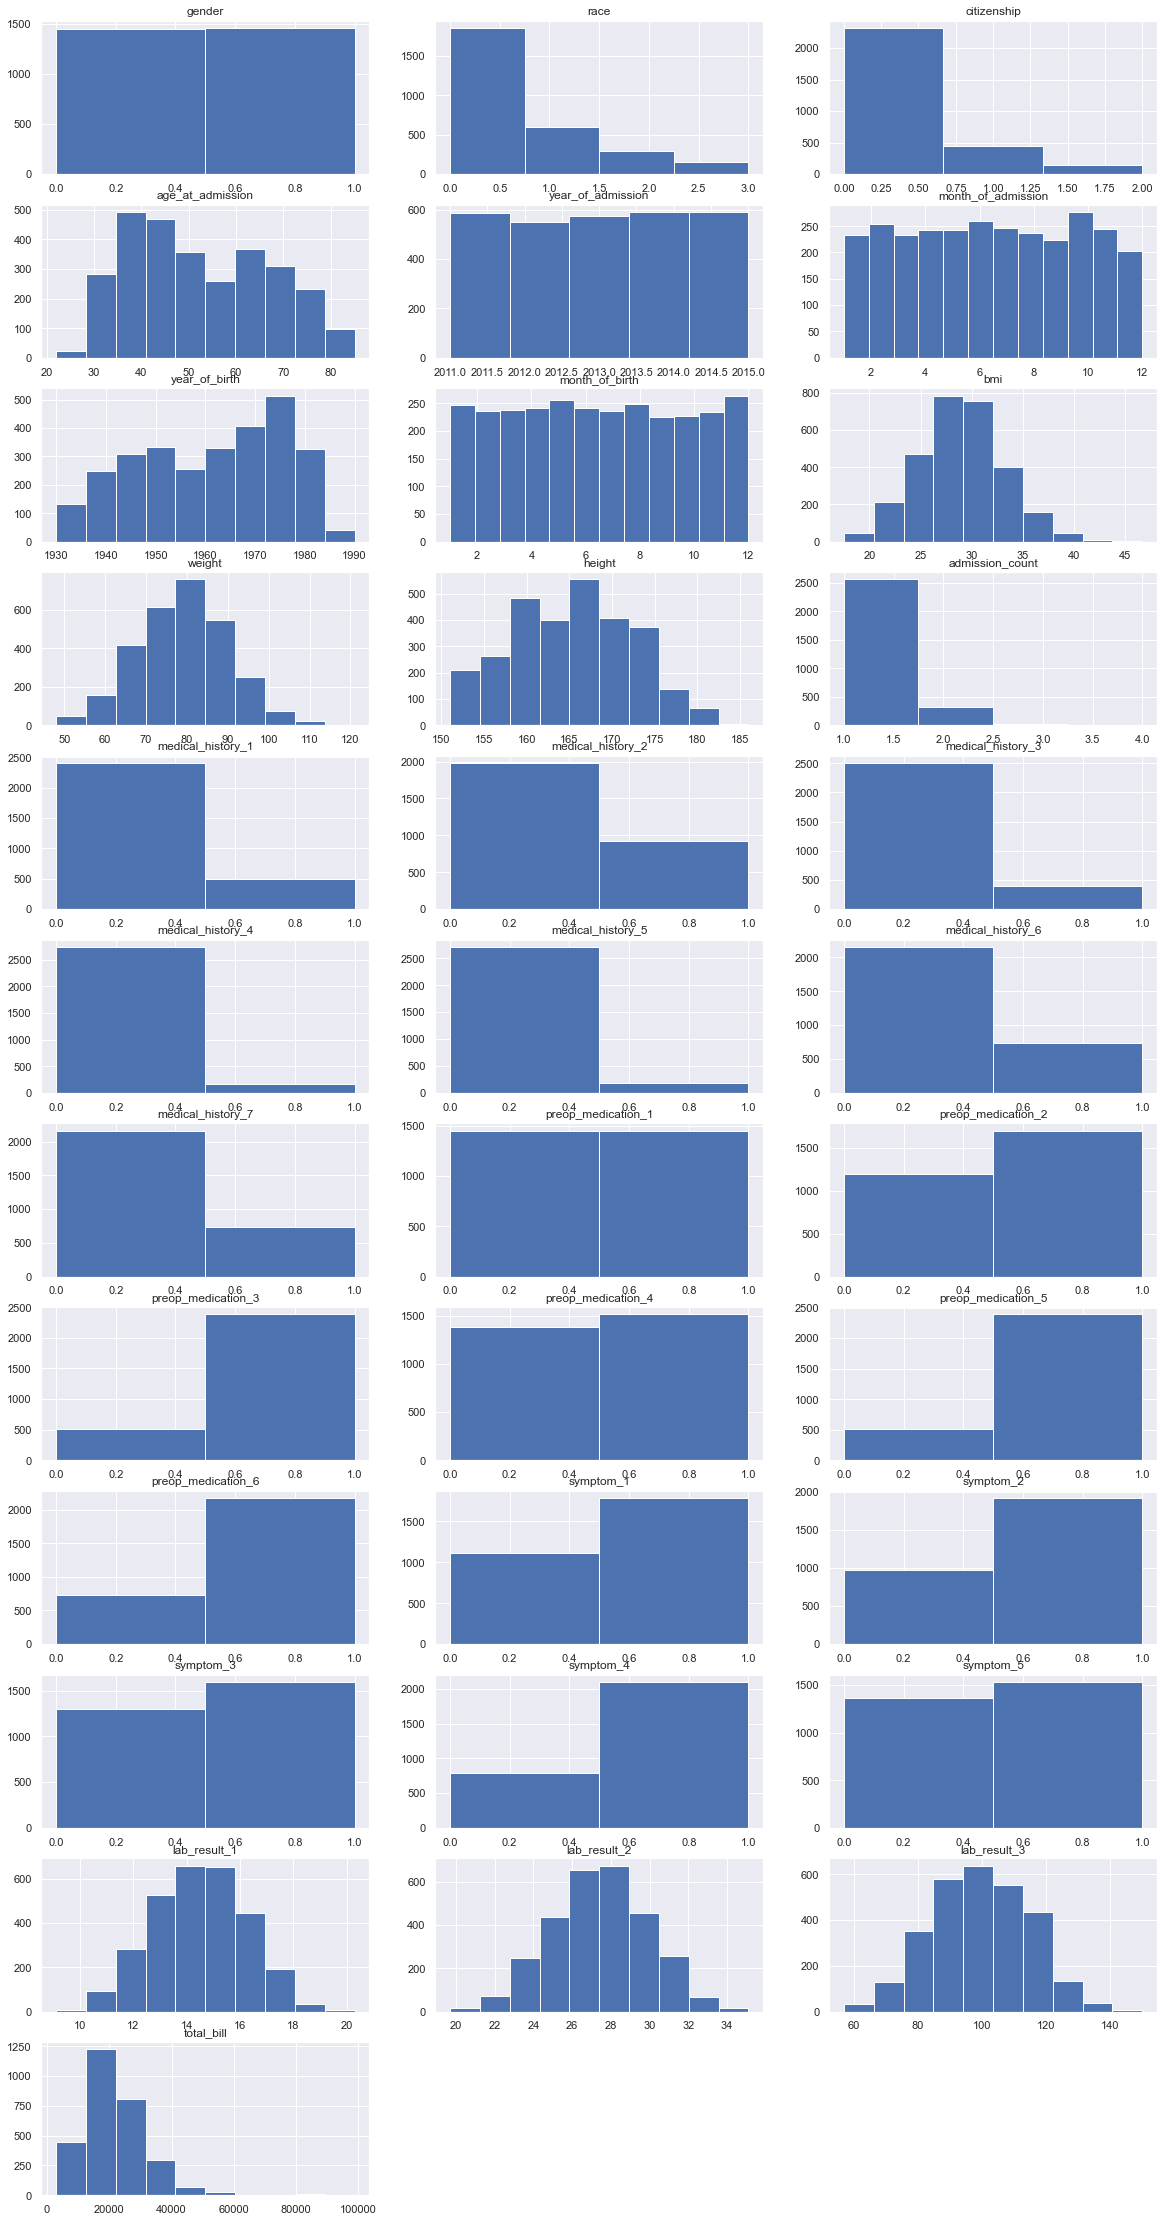

In [71]:
# Histogram
fig = plt.figure(1)
fig.set_figheight(40)
fig.set_figwidth(20)
columns = 3
rows = 12

for i in range(len(work_on.columns)):
    fig.add_subplot(rows, columns, i+1)
    if len(work_on[work_on.columns[i]].unique()) < 15:
        bins = len(work_on[work_on.columns[i]].unique())
        plt.hist(work_on[work_on.columns[i]], bins = bins)
    else: 
        plt.hist(work_on[work_on.columns[i]])
    plt.title(work_on.columns[i])
    
# plt.tight_layout()
plt.show()

In [72]:
pd.options.display.max_columns = 100
work_on.describe(include="all")

,gender,race,citizenship,age_at_admission,year_of_admission,month_of_admission,year_of_birth,month_of_birth,bmi,weight,height,admission_count,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,total_bill
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000
mean,0.501725,0.565217,0.248792,52.432712,2013.015528,6.454451,1960.582816,6.494479,28.980793,78.860041,165.133540,1.123188,0.171498,0.317460,0.137336,0.054520,0.064872,0.256384,0.253968,0.500345,0.587647,0.821601,0.522429,0.823671,0.749137,0.615942,0.661836,0.550380,0.725673,0.528295,14.458109,27.421843,99.517253,21945.900483
std,0.500083,0.871870,0.531253,14.680246,1.422039,3.410196,14.599174,3.471985,4.139007,11.033373,7.032675,0.348091,0.377008,0.465569,0.344261,0.227081,0.246343,0.436711,0.435355,0.500086,0.492343,0.382914,0.499583,0.381165,0.433584,0.486456,0.473166,0.497541,0.446252,0.499285,1.746524,2.483794,15.297303,10316.927510
min,0.000000,0.000000,0.000000,22.000000,2011.000000,1.000000,1930.000000,1.000000,17.508651,48.000000,151.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,57.000000,2946.100000
25%,0.000000,0.000000,0.000000,40.000000,2012.000000,4.000000,1948.000000,4.000000,26.220464,71.300000,160.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.700000,88.000000,14887.250000
50%,1.000000,0.000000,0.000000,50.000000,2013.000000,6.000000,1962.500000,6.000000,28.967031,79.000000,165.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.400000,27.400000,100.000000,20163.250000
75%,1.000000,1.000000,0.000000,65.000000,2014.000000,9.000000,1973.000000,10.000000,31.684142,86.375000,171.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.700000,29.200000,110.000000,26810.090000
max,1.000000,3.000000,2.000000,85.000000,2015.000000,12.000000,1990.000000,12.000000,46.677349,121.000000,186.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,98723.860000


Now let's look at each categorical variable, and see if there are any significant differences

In [73]:
work_on.dtypes

gender                  int64
race                    int64
citizenship             int64
age_at_admission        int64
year_of_admission       int64
month_of_admission      int64
year_of_birth           int64
month_of_birth          int64
bmi                   float64
weight                float64
height                  int64
admission_count         int64
medical_history_1       int64
medical_history_2       int64
medical_history_3       int64
medical_history_4       int64
medical_history_5       int64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3            int64
total_bill

segregate function to help with segregating by a variable
Takes in a:
- column: column name that we want to segregate
- dataframe: pandas dataframe that we will get the data from
- look_at: the variable name that we want to compare across the segregated groups

Outputs the mean, std, and table of p-values

In [74]:
# Function to get mean and std of each unique value in a column,
# and get between group p-value

def segregate(column, dataframe, look_at):
    values = dataframe[column].unique()
    mean = []
    std = []
    dfs = []
    p_values = [[0 for i in range(len(values))] for j in range(len(values))]
    print(column)
    for i in range(len(values)):
        df = dataframe[dataframe[column]==values[i]]
        dfs.append(df[look_at])
        
        # Calculate mean and std
        mean.append(df[look_at].mean())
        std.append(df[look_at].std())
        print(f"{values[i]} bill mean: {mean[-1]}, {values[i]} bill std:, {std[-1]}")
        
        # Calculate t-test between groups
        j = i
        while j >= 0:
            p_values[i][j] = stats.ttest_ind(a=dfs[i], b=dfs[j], equal_var=False)[1]
            p_values[j][i] = p_values[i][j]
            j -= 1
    
    # Print out p-value table
    p = pd.DataFrame(p_values, columns=values)
    p.index = values
    print(p)
    
    print("")
        

In [75]:
females = work_on[work_on["gender"]==0]
males = work_on[work_on["gender"]==1]
print(stats.ttest_ind(a=females["total_bill"], b=males["total_bill"], equal_var=True))

Ttest_indResult(statistic=-3.092092244086648, pvalue=0.0020064354923776764)


In [76]:
# Let's look at all the categorical variables at once

categories = ['gender', 'race', 'citizenship', 'year_of_admission', 
              'month_of_admission', 'admission_count',
              'medical_history_1', 'medical_history_2', 'medical_history_3',
              'medical_history_4', 'medical_history_5', 'medical_history_6',
              'medical_history_7', 'preop_medication_1', 'preop_medication_2',
              'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
              'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
              'symptom_4', 'symptom_5']

for category in categories:
    segregate(category, work_on, "total_bill")

gender
0 bill mean: 21352.139736842095, 0 bill std:, 10234.013746453225
1 bill mean: 22535.577592847323, 1 bill std:, 10368.517258404356
          0         1
0  1.000000  0.002005
1  0.002005  1.000000

race
0 bill mean: 19108.402506738526, 0 bill std:, 7925.222876052958
2 bill mean: 23894.312542372874, 2 bill std:, 9243.60735515768
1 bill mean: 29920.94854515049, 1 bill std:, 12829.662145540751
3 bill mean: 21410.55680000002, 3 bill std:, 9826.262682349516
              0             2             1             3
0  1.000000e+00  8.994168e-16  1.632621e-68  5.774654e-03
2  8.994168e-16  1.000000e+00  3.948870e-15  1.065224e-02
1  1.632621e-68  3.948870e-15  1.000000e+00  7.215219e-17
3  5.774654e-03  1.065224e-02  7.215219e-17  1.000000e+00

citizenship
0 bill mean: 20184.59049676031, 0 bill std:, 8171.434537460525
2 bill mean: 42063.55449275362, 2 bill std:, 18335.01747080778
1 bill mean: 24869.937258426966, 1 bill std:, 9603.53155596999
              0             2             1
0

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


One of the patients visited the hospital 4 times!

Though we see that the mean bill cost for 3 admission_count is lower than that for 2 admission_count, the sample size for 3 is quite low.

In [79]:
work_on["admission_count"].value_counts()

1    2559
2     322
3      16
4       1
Name: admission_count, dtype: int64

In [58]:
work_on.columns

Index(['gender', 'race', 'citizenship', 'age_at_admission',
       'year_of_admission', 'month_of_admission', 'year_of_birth',
       'month_of_birth', 'bmi', 'weight', 'height', 'admission_count',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'total_bill'],
      dtype='object')

In [62]:
# admission_count seems to give some weird NaNs

work_on.groupby("admission_count").describe()

# No wonder, because only 1 person got admitted twice, and only 1 person
# got admitted 3 times. So we can't make much comparisons

# Maybe the nan_df will have more patients with repeated visits

# I think the calculation of admission_counts was not done correctly

gender                                                 race  \
                  count      mean       std  min  25%  50%  75%  max   count   
admission_count                                                                
1                2896.0  0.502072  0.500082  0.0  0.0  1.0  1.0  1.0  2896.0   
2                   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0     1.0   
3                   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0     1.0   

                                                             citizenship  \
                     mean       std  min  25%  50%  75%  max       count   
admission_count                                                            
1                0.565608  0.872044  0.0  0.0  0.0  1.0  3.0      2896.0   
2                0.000000       NaN  0.0  0.0  0.0  0.0  0.0         1.0   
3                0.000000       NaN  0.0  0.0  0.0  0.0  0.0         1.0   

                                                             age_at_admission  \
                     mean       std  min  25%  50%  75%  max            count   
admission_count                                                                 
1                0.248964  0.531397  0.0  0.0  0.0  0.0  2.0           2896.0   
2                0.000000       NaN  0.0  0.0  0.0  0.0  0.0              1.0   
3                0.000000       NaN  0.0  0.0  0.0  0.0  0.0              1.0   

                                                                     \
                      mean        std   min   25%   50%   75%   max   
admission_count                                                       
1                52.438536  14.679666  22.0  40.0  50.0  65.0  85.0   
2                31.000000        NaN  31.0  31.0  31.0  31.0  31.0   
3                57.000000        NaN  57.0  57.0  57.0  57.0  57.0   

                year_of_admission                                         \
                            count         mean       std     min     25%   
admission_count                                                            
1                          2896.0  2013.015193  1.422413  2011.0  2012.0   
2                             1.0  2014.000000       NaN  2014.0  2014.0   
3                             1.0  2013.000000       NaN  2013.0  2013.0   

                                        month_of_admission            \
                    50%     75%     max              count      mean   
admission_count                                                        
1                2013.0  2014.0  2015.0             2896.0  6.455456   
2                2014.0  2014.0  2014.0                1.0  4.000000   
3                2013.0  2013.0  2013.0                1.0  6.000000   

                                                     year_of_birth  \
                      std  min  25%  50%   75%   max         count   
admission_count                                                      
1                3.411059  1.0  4.0  6.0  9.25  12.0        2896.0   
2                     NaN  4.0  4.0  4.0  4.00   4.0           1.0   
3                     NaN  6.0  6.0  6.0  6.00   6.0           1.0   

                              ... symptom_3      symptom_4            \
                        mean  ...       75%  max     count      mean   
admission_count               ...                                      
1                1960.576657  ...       1.0  1.0    2896.0  0.725829   
2                1983.000000  ...       1.0  1.0       1.0  0.000000   
3                1956.000000  ...       1.0  1.0       1.0  1.000000   

                                                   symptom_5            \
                      std  min  25%  50%  75%  max     count      mean   
admission_count                                                          
1                0.446173  0.0  0.0  1.0  1.0  1.0    2896.0  0.528315   
2                     NaN  0.0  0.0  0.0  0.0  0.0       1.0  0.000000   
3                     NaN  1.0  1.0  1.0  1.0  1.0 

In [63]:
# A quick look at nan_df
for category in categories:
    segregate(category, nan_df, "total_bill")

gender
1 bill mean: 21912.43192622951, 1 bill std:, 9851.72629291755
0 bill mean: 20833.289844961237, 0 bill std:, 8440.519716680043
          1         0
1  1.000000  0.189288
0  0.189288  1.000000

race
1 bill mean: 27229.597706422028, 1 bill std:, 9079.974339061231
0 bill mean: 19181.49813504824, 0 bill std:, 8353.90175227633
3 bill mean: 20912.578787878792, 3 bill std:, 10929.74548322597
2 bill mean: 22408.877551020414, 2 bill std:, 7052.269995590525
              1             0         3         2
1  1.000000e+00  7.504381e-14  0.004114  0.000433
0  7.504381e-14  1.000000e+00  0.383144  0.004977
3  4.113575e-03  3.831438e-01  1.000000  0.490272
2  4.331396e-04  4.976904e-03  0.490272  1.000000

citizenship
0 bill mean: 20363.391466992678, 0 bill std:, 7873.097547825551
2 bill mean: 39545.10173913044, 2 bill std:, 14157.904829669813
1 bill mean: 21192.253142857146, 1 bill std:, 7917.911968156015
          0         2         1
0  1.000000  0.000001  0.420002
2  0.000001  1.000000 